# Auto Loan Default Detection

###  Henry Chung


<img src="" width="500" length = "200"/>

Source: <a href="https://www.rd.com/wp-content/uploads/2021/04/GettyImages-861879906-MLedit-1.jpg">PAUL CAMPBELL/GETTY IMAGES
</a>

In [1062]:
# data analysis and wrangling
from pandas import DataFrame
import numpy as np
import random as rnd
import math
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as stats

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
#from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# pipeline setup
#from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
# cross validation
from sklearn.model_selection import KFold
# Import the evaluation matrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve


from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# evaluation on test data
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# import library for Gradient Boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
#import imbalance for SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

#import pickle
import pickle
import joblib
from joblib import parallel_backend
from sklearn.utils import class_weight

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix


#for NN network
import tensorflow as tf    
from tensorflow import keras  

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, auc 
from sklearn.dummy import DummyClassifier

from keras.utils.all_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras import losses, metrics
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping

# from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from keras.regularizers import l1, l2

# Goal: Build a model that can accurately identify auto loan default.

# Overview and Business Understanding

Business Understanding

Due to increased income mainly from stimulus check and supply chain shortages, demand for cars has been sky rocketing. The auto loan market has been on a wild ride since the pandemic. According to Experian, the average auto loan balance exceeded 20,000, and consumers owed a total of 1.4 trillion on the vehicles they drive in the third quarter of 2021, an increase of 78 million over the previous 12 months. <a href="https://www.experian.com/blogs/ask-experian/research/auto-loan-debt-study/">(Experian)</a>.

The deliquency rate remains lower than the pandemic levels. 1.63 percent of auto loans haven’t received a payment in at least 60 days. <a href= "https://jalopnik.com/it-sure-feels-like-a-car-loan-crisis-is-coming-1849412955">(Jalopnik)</a>, and Equifax found that 2.14 percent of auto loans in the first six months of this year were more than 120 days behind on payments. However, Auto loan delinquencies a concern as they hit highest level since 2007. <a href="https://www.cnbc.com/video/2022/05/20/auto-loan-delinquencies-come-into-concern-as-they-hit-highest-levels-since-2007-says-bankrate-coms-mcbride.html">(CNBC)</a>. The Fed has raised the interest 3 times in 2022 to help fight high inflation. While high inflation and interest rates can increase delinquencies, unemployment was the most likely metric for the industry to watch.

Business stake holder:
A bank manager who wants to minimize the number of defaulted loans in his position


When the loan default, the bank would only be able to recoup the loan by repossessing the vehicle and selling it back to the market. However, it would generate financial losses due to car depreciation and the condition. Even if the collateral is taken, the time and money spent to turn it into funds can leave the lender with a negative return.<a href="https://www.gdslink.com/credit-risk-management-process-best-practices-techniques/">(GDS)</a> This project aims to provide a machine learning model to assist bankers in identifying auto loan defaults to prevent economic losses. Models will be judged mainly based on their F1Score. F1Score is the harmonic mean of Recall and Precision. The model recall score represents the model’s ability to correctly predict the positives out of actual positives. Hence, a low recall score means the model cannot identify the real default case out of all default cases. The model precision score measures the power of the model to correct. For example, a 50% precision score means that half of the time, when it predicts the default case, it does not default. We try to avoid low precision and low recall score. A perfect F1 score is 1, and the lower precision and recall score would generate a low F1 score. 



# Data Sources

In this project, we will focus on classifying whether loans are defaulted using data collected from a project competition in the Hackathon platform via Kaggle, which can be found at this link. https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon?select=Test_Dataset.csv.

The site provides two datasets, TrainDataset and TestDataset. This model building is to be done on TrainDataset. Test dataset from the link isn't used as ['Default'] data is missing.

There are 121856 total rows of data. There are 39 columns of features. In the first column, respondent_id is a unique and random identifier. The remaining 38 features are described in the data library description.

Data library description is shown as below.

In [1063]:
file_path_1 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Train_Dataset.csv')
file_path_2 = ('\\Users\\eggfr\\Flatiron\\Flatiron_phase5cap\\Flatiron_phase5cap\\data\\Auto_Data_Dictionary.csv')


In [1064]:
# let's take a look of the meaning of each columns
def left_align(df: DataFrame):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df
left_align(autoloan_lib_raw_df)

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


In [1065]:
autoloan_lib_raw_df = pd.read_csv(file_path_2,encoding='unicode_escape') 

Now, let's look at this data set's 40 columns of features.

In [1066]:
autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape') 
autoloan_raw_df.head()

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\4212711854.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  autoloan_raw_df = pd.read_csv(file_path_1,encoding='unicode_escape')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [1067]:
#autoloan_raw_df = autoloan_raw_df.drop(columns=['ID','Own_House_Age','Social_Circle_Default','Score_Source_1','Score_Source_2','Score_Source_3','Type_Organization'], axis=1)

#Initial Data Preparation: 

The following steps below are preliminary data cleaning (mostly, changing data type) just to get the dataframe before train_test_split. Handling of missing values will be performed following the split.

Convert the following variabrles into numeric type from categorical variables.

In [1068]:
autoloan_raw_df['Client_Income'] = pd.to_numeric(autoloan_raw_df['Client_Income'], errors='coerce')
autoloan_raw_df['Credit_Amount'] = pd.to_numeric(autoloan_raw_df['Credit_Amount'], errors='coerce')
autoloan_raw_df['Loan_Annuity'] = pd.to_numeric(autoloan_raw_df['Loan_Annuity'], errors='coerce')
autoloan_raw_df['Age_Days'] = pd.to_numeric(autoloan_raw_df['Age_Days'], errors='coerce')
autoloan_raw_df['Employed_Days'] = pd.to_numeric(autoloan_raw_df['Employed_Days'], errors='coerce')
autoloan_raw_df['Registration_Days'] = pd.to_numeric(autoloan_raw_df['Registration_Days'], errors='coerce')
autoloan_raw_df['ID_Days'] = pd.to_numeric(autoloan_raw_df['ID_Days'], errors='coerce')

Convert the following variabrles into 'object type'. Despite being in integer form, we are going to convert it to object because these are categorical variables.

In [1069]:
autoloan_raw_df['Application_Process_Day'] = autoloan_raw_df['Application_Process_Day'].astype('object')
autoloan_raw_df['Application_Process_Hour'] = autoloan_raw_df['Application_Process_Hour'].astype('object')

Convert the following categorical variabrles into 0 and 1, and it will make it easier to build the pipeline laterb

In [1070]:
autoloan_raw_df['Client_Contact_Work_Tag'].replace({'No': 0, 'Yes': 1}, inplace=True) 
autoloan_raw_df['Client_Permanent_Match_Tag'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [1071]:
autoloan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

# Exploratory Data Analysis

Let's examine default status of loan of this data set. [Default] is the target variable of this analysis, and we will use rest of the feaures to preditct ['Default] 

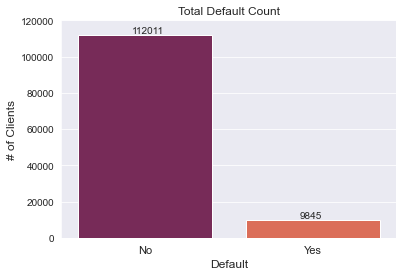

In [1072]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Default", data=autoloan_raw_df, palette="rocket")

plt.xlabel("Default", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
ax.set(title='Total Default Count')
plt.ylim(0,120000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

Around 8% of loans is defaulted, so it is an imbalanced dataset.

In [1073]:
autoloan_raw_df['Default'].value_counts(normalize=True)

0    0.919208
1    0.080792
Name: Default, dtype: float64

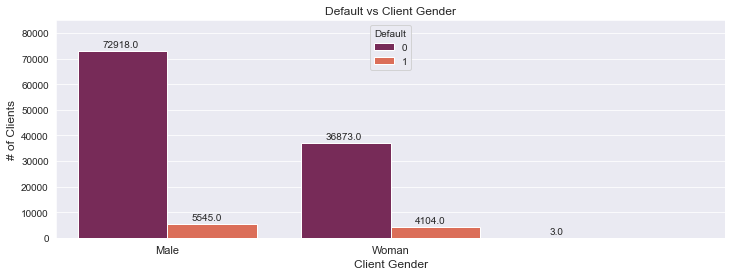

In [1074]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = autoloan_raw_df, x = 'Client_Gender', hue="Default", palette = 'rocket')

plt.xlabel("Client Gender", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
ax.set(title='Default vs Client Gender')
plt.ylim(0,85000)
plt.xticks([0,1],['Male','Woman'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+1500))

plt.show()

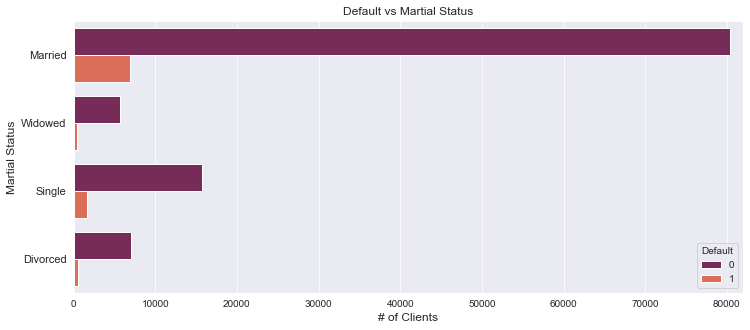

In [1075]:
plt.figure(figsize=(12,5))

ay = sns.countplot(data = autoloan_raw_df, y = 'Client_Marital_Status', hue="Default", palette = 'rocket')
ay.set(title='Default vs Martial Status')
plt.ylabel("Martial Status", fontsize= 12)
plt.xlabel("# of Clients", fontsize= 12)
plt.xlim(0,82000)
plt.yticks([0,1,2,3],['Married','Widowed','Single','Divorced'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+1500))

plt.show()


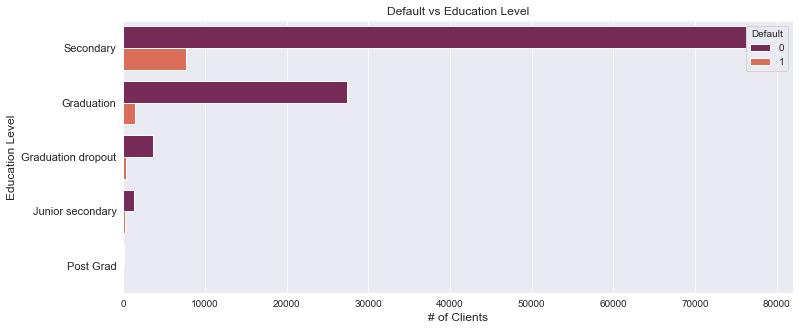

In [1076]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = autoloan_raw_df, y = 'Client_Education', hue="Default", palette = 'rocket')
ax.set(title='Default vs Education Level')
plt.ylabel("Education Level", fontsize= 12)
plt.xlabel("# of Clients", fontsize= 12)
plt.xlim(0,82000)
plt.yticks([0,1,2,3,4],['Secondary','Graduation','Graduation dropout','Junior secondary','Post Grad'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_y()+0.11, p.get_height()+1500))

plt.show()


Let's look at the distribution of the features related to the borrower's ability. They are all left skewed.

<Figure size 720x720 with 0 Axes>

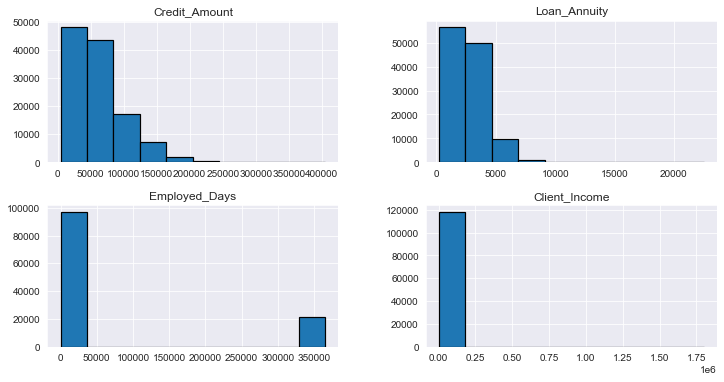

In [1077]:
plt.figure(figsize=(10,10))

cols_to_plot = ['Credit_Amount','Loan_Annuity','Employed_Days','Client_Income']
autoloan_raw_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

# Visualization of Default Loan by Numerical Features.

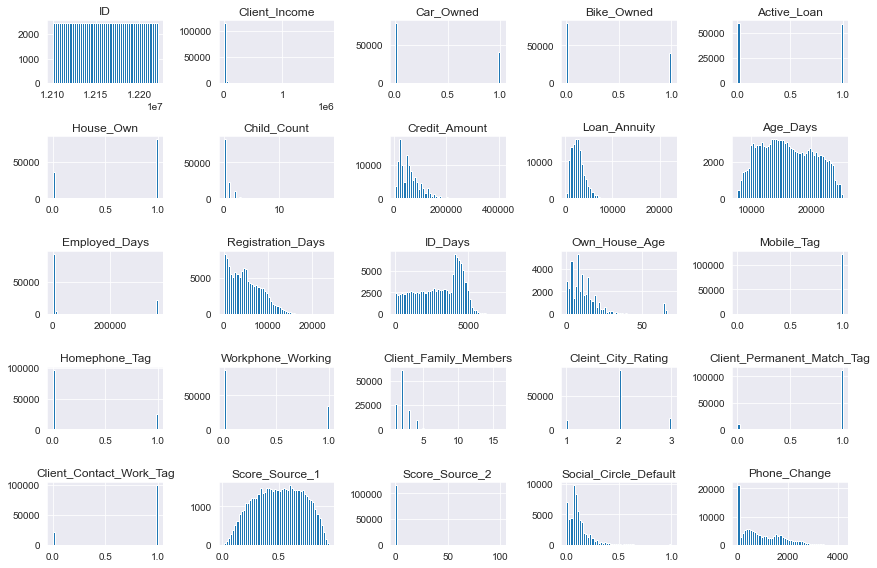

In [1078]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

The histogram shows that outliers may exist with these
 variables:'Client_Income','Credit_Amount','Child_Count','Credit_Bureau','Own_House_Age', and 'Employed_Days'. Let's investagate further with a boxplot for these variables.

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Client_Income'>

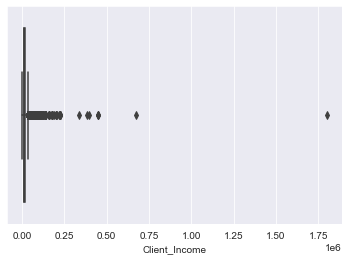

In [1079]:
sns.boxplot(autoloan_raw_df['Client_Income'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Amount'>

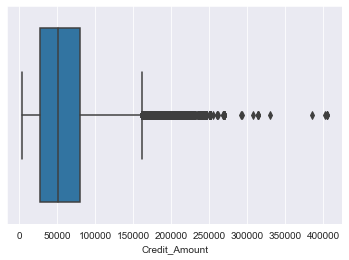

In [1080]:
sns.boxplot(autoloan_raw_df['Credit_Amount'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Child_Count'>

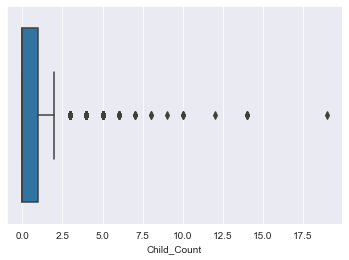

In [1081]:
sns.boxplot(autoloan_raw_df['Child_Count'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Bureau'>

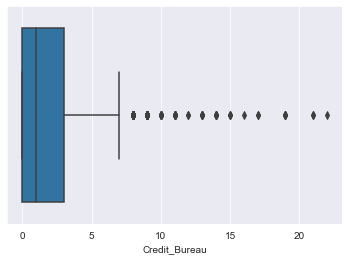

In [1082]:
sns.boxplot(autoloan_raw_df['Credit_Bureau'])

In [1083]:
#sns.boxplot(autoloan_raw_df['Own_House_Age'])

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employed_Days'>

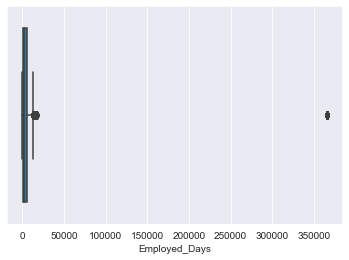

In [1084]:
sns.boxplot(autoloan_raw_df['Employed_Days'])

Outlier Removal

These features have some outliers, and we will remove them by looking at the quantile and the number of data that will be dropped.

Client Income

In [1085]:
high_bound = autoloan_raw_df['Client_Income'].quantile(0.995)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Client_Income'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 63000.0
low_bound : 3150.0


In [1086]:
inliers_index = (autoloan_raw_df['Client_Income'] > low_bound) & (autoloan_raw_df["Client_Income"] < high_bound)
print(inliers_index.value_counts())
print(autoloan_raw_df.shape)
print(autoloan_raw_df[inliers_index].shape)
autoloan_raw_df = autoloan_raw_df[inliers_index] # replaces autoloan_raw_df with only the rows that satisfy the thresholds


True     117459
False      4397
Name: Client_Income, dtype: int64
(121856, 40)
(117459, 40)


'Credit_Amount'

In [1087]:
high_bound = autoloan_raw_df['Credit_Amount'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Credit_Amount'].quantile(0.001)
print('low_bound :', low_bound)


high_bound : 246384.0
low_bound : 4797.0


In [1088]:
inliers_index = (autoloan_raw_df['Credit_Amount'] > low_bound) & (autoloan_raw_df["Credit_Amount"] < high_bound)
autoloan_raw_df = autoloan_raw_df[inliers_index] # replaces autoloan_raw_df with only the rows that satisfy the thresholds


In [1089]:
autoloan_raw_df.shape

(113693, 40)

'Child_Count'

In [1090]:
high_bound = autoloan_raw_df['Child_Count'].quantile(0.99995)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Child_Count'].quantile(0.000)
print('low_bound :', low_bound)


high_bound : 10.970600000000559
low_bound : 0.0


In [1091]:
inliers_index = (autoloan_raw_df["Child_Count"] < high_bound)
print(autoloan_raw_df[inliers_index].shape)

(110289, 40)


In [1092]:
high_bound = autoloan_raw_df['Credit_Bureau'].quantile(0.9999999999)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Credit_Bureau'].quantile(0.000)
print('low_bound :', low_bound)


high_bound : 21.99999035669316
low_bound : 0.0


In [1093]:
inliers_index = (autoloan_raw_df['Credit_Bureau'] < high_bound)
print(inliers_index.value_counts())
print(autoloan_raw_df[inliers_index].shape)

True     96433
False    17260
Name: Credit_Bureau, dtype: int64
(96433, 40)


Employed_Days

With further investigation, 10% of the employed_days is >300000 days. While this may be inaccurate, 10% of the data is significant. Hence, employed_days won't be dropped for outliers.

In [1094]:
high_bound = autoloan_raw_df['Employed_Days'].quantile(0.908)
print('high_bound :', high_bound)
low_bound = autoloan_raw_df['Employed_Days'].quantile(0.001)
print('low_bound :', low_bound)
inliers_index = (autoloan_raw_df['Credit_Bureau'] < high_bound)
print(inliers_index.value_counts())

# alternatives: df.drop

high_bound : 365243.0
low_bound : 56.0
True     96434
False    17259
Name: Credit_Bureau, dtype: int64


We will have 113693 rows of data for analysis after outlier removals.

In [1095]:
autoloan_raw_df.shape

(113693, 40)

Let's plot the historgram for the numerical features after remove outliers

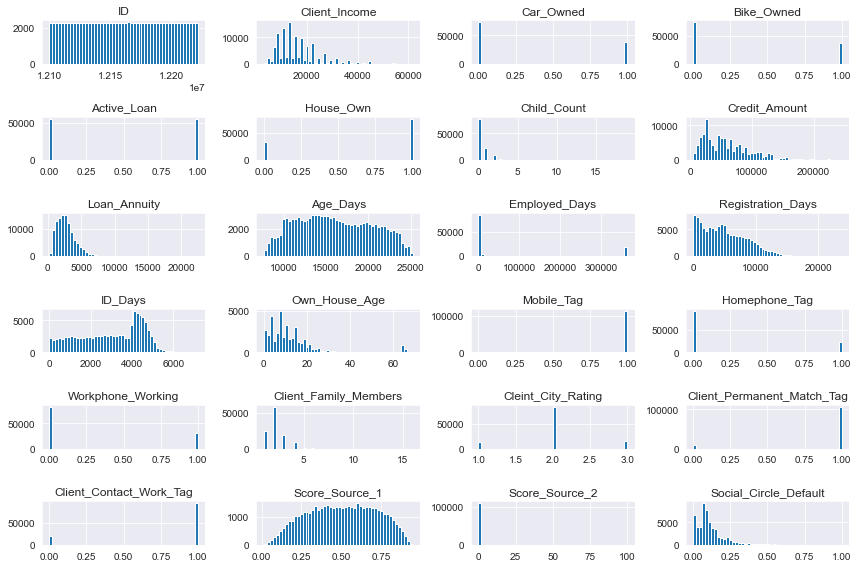

In [1096]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12, 8))

numericals = [column for column in autoloan_raw_df.select_dtypes(['int', 'float']).columns]

for feature, ax in zip(numericals, axes.flatten()):
    ax.hist(autoloan_raw_df[feature], bins=50)
    ax.set_title(feature)
    
fig.tight_layout()

# Visualization of Default Status and Client Income and Credit Amount

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


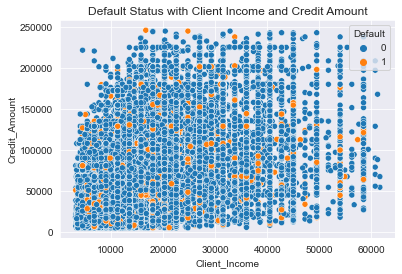

<Figure size 2304x1872 with 0 Axes>

In [1097]:
sns.scatterplot(autoloan_raw_df['Client_Income'], autoloan_raw_df['Credit_Amount'], hue=autoloan_raw_df['Default'])
plt.title('Default Status with Client Income and Credit Amount')
plt.figure(figsize=(32,26))
plt.show()

The scatter plot shows no pattern in default status between client income and credit amount.

# Correlation of between features.

Most of the feature doesn't have much correlation against each other, except credit amount and loan annuity.

<AxesSubplot:>

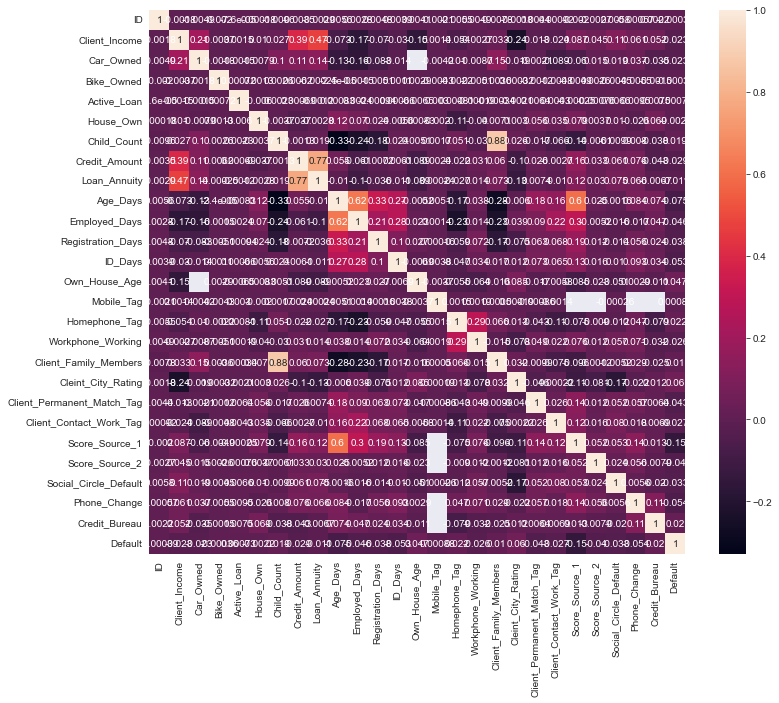

In [1098]:
plt.figure(figsize=(12,10))
sns.heatmap(autoloan_raw_df.corr(),annot = True)

Fill in missing data.

Any data that's missing 3% data would consider random and will be filled with the most frequency in the pipeline.Client_Occupation, Credit_Bureau, ID_Days, Loan_Annuity, and Population_Region_Relative all have more than 3% missing data and will be filled with custom methods.Client_Occupation has 34% missing data. However, we don't want to drop it because it may give us vital information. Missing data will be filled with "other."

Drop features that is not used in this analyze.

In [1099]:
autoloan_raw_df = autoloan_raw_df.drop(columns=['ID','Own_House_Age','Social_Circle_Default','Score_Source_1','Score_Source_2','Score_Source_3','Type_Organization'], axis=1)

Let's seperate our feature variables and target variables, which is default.

In [1100]:
x = autoloan_raw_df.drop(["Default"], axis=1)
y = autoloan_raw_df["Default"]

In [1101]:
x.shape

(113693, 32)

# Train Test Split

Separating data into training and testing sets is essential in evaluating the models. Most of the data is used for training, and a smaller portion of the information is used for testing. For this analysis: we only split data into train and test. 80% of the data is for training and 20% for tests. Below we will perform a Train-Test Split and specify a stratify=y to ensure an even balance for default balance and not default in the split.

In [1102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify = y, random_state=42)

In [1103]:
#create a cv_score function for validation
def print_cv_scores(pipe, x, y):
    '''
    using given pipeline and prints the training and cross_val scores
    '''
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']
    # This speeds up the processing
    with parallel_backend('threading', n_jobs=-1):
        # Pass in pipe to cross validate along with a feature list; keep standard 5-fold cross-validation
        results = cross_validate(pipe, x, y, cv=5, return_train_score=True, scoring=scoring)
    
    print(f"Training Accuracy: {round(results['train_accuracy'].mean(), 6)}")
    print(f"Cross_Val Accuracy: {round(results['test_accuracy'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Precision: {round(results['train_precision_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Precision: {round(results['test_precision_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro Recall: {round(results['train_recall_macro'].mean(), 6)}")
    print(f"Cross_Val Macro Recall: {round(results['test_recall_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro F1 Score: {round(results['train_f1_macro'].mean(), 6)}")
    print(f"Cross_Val Macro F1 Score: {round(results['test_f1_macro'].mean(), 6)}")
    print('-'*40)
    print(f"Training Macro AUC Score: {round(results['train_roc_auc_ovr'].mean(), 6)}")
    print(f"Cross_Val Macro AUC Score: {round(results['test_roc_auc_ovr'].mean(), 6)}")

# Create Column Transformer to Preprocess Data

Let's set up a column transformer first. This columntransformer is made up 5 different pipelines. They are first imputed with the data as disccused in the EDA sections. For categorical variables, it will be transformed with either one hot encoder or ordinal encorder. Then, they will be all set up in the columntransformer.  

In [1104]:
#Lets Set up the column transformer
Client_Education_list = ['Junior secondary','Secondary','Graduation dropout','Graduation','Post Grad']
Client_Marital_Status_list = ['D','W','M','S']
ohe_cols = ['Accompany_Client','Client_Income_Type','Client_Gender','Loan_Contract_Type','Client_Housing_Type','Application_Process_Day','Application_Process_Hour']
num_cols = list(x.select_dtypes(['int', 'float']).columns)

nominal_Client_Occupation_pipeline = Pipeline([
    ('onehotimputer',SimpleImputer(strategy = 'constant',fill_value= "Other") ),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

numeric_pipeline = Pipeline([
    ('numimputer', SimpleImputer(strategy = 'mean')), 
    ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False,handle_unknown='ignore')), 
    ('onehotnorm', StandardScaler())])

ordinal_Client_Marital_Status_pipeline = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Marital_Status_list])),
    ('ordnorm', StandardScaler())])

ordinal_Client_Education_pipeline = Pipeline([
     ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [Client_Education_list])),
     ('ordnorm', StandardScaler())])

ct = ColumnTransformer(
    [ ("ordinalpipe", ordinal_Client_Education_pipeline, ['Client_Education']),
       ("ordinalpipe2", ordinal_Client_Marital_Status_pipeline, ['Client_Marital_Status']),
       ("nominalpipe", nominal_pipeline,ohe_cols),
       ("nominalpipe2", nominal_Client_Occupation_pipeline,['Client_Occupation']),
       ("numpipe", numeric_pipeline, num_cols)])

In [1105]:
ct.fit(x,y)
# get_column_names_from_ColumnTransformer(ct)

ColumnTransformer(transformers=[('ordinalpipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordenc',
                                                  OrdinalEncoder(categories=[['Junior '
                                                                              'secondary',
                                                                              'Secondary',
                                                                              'Graduation '
                                                                              'dropout',
                                                                              'Graduation',
                                                                              'Post '
                                                                              'Grad']])),
                                                 ('ordnorm',
                                                  StandardScaler())]),
                                 ['Client_Education']),
                                ('ordinalpipe2',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImput...
                                 ['Client_Income', 'Car_Owned', 'Bike_Owned',
                                  'Active_Loan', 'House_Own', 'Child_Count',
                                  'Credit_Amount', 'Loan_Annuity', 'Age_Days',
                                  'Employed_Days', 'Registration_Days',
                                  'ID_Days', 'Mobile_Tag', 'Homephone_Tag',
                                  'Workphone_Working', 'Client_Family_Members',
                                  'Cleint_City_Rating',
                                  'Client_Permanent_Match_Tag',
                                  'Client_Contact_Work_Tag', 'Phone_Change',
                                  'Credit_Bureau'])])

# Pipeline and Baseline Model

We use SMOTE to oversample our data. However, SMOTE doesn't work if we only use one sklearn pipeline as it doesn't have the fit_transfrom function. So we have to break it into two different pipelines. One is for preprocessing data with column transformer and SMOTE, and the other is for the modeling pipeline. 

In [1106]:
# Need to seperate 2 pipelines
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))
                    ])  #setup preprocessing pipeline

baseline_pipe = Pipeline([
                          
                          ('classifier', DummyClassifier(strategy='most_frequent'))]) #set up model pipeline

In [1107]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

Let's check to see if our y_train data is balanced.

In [1108]:
print(y_resampled.value_counts())

0    83548
1    83548
Name: Default, dtype: int64


That's 50-50 for both classes instead of 92%-8%.

In [1109]:
print_cv_scores(baseline_pipe, x_resampled, y_resampled.values.ravel())

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\l

Training Accuracy: 0.500003
Cross_Val Accuracy: 0.499988
----------------------------------------
Training Macro Precision: 0.250001
Cross_Val Macro Precision: 0.249994
----------------------------------------
Training Macro Recall: 0.5
Cross_Val Macro Recall: 0.5
----------------------------------------
Training Macro F1 Score: 0.333335
Cross_Val Macro F1 Score: 0.333328
----------------------------------------
Training Macro AUC Score: 0.5
Cross_Val Macro AUC Score: 0.5


In [1110]:
 baseline_pipe.fit(x_resampled, y_resampled)  #train the baseline model

Pipeline(steps=[('classifier', DummyClassifier(strategy='most_frequent'))])

We also need to transfrom x_test_data.

In [1111]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #transform x_test_data

In [1112]:
y_pred0 = baseline_pipe.predict(x_test_processed) #baseline model prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


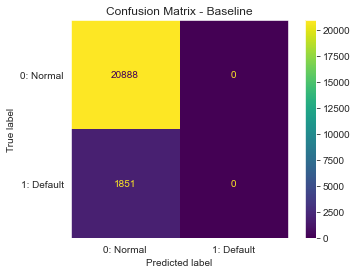

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20888
           1       0.00      0.00      0.00      1851

    accuracy                           0.92     22739
   macro avg       0.46      0.50      0.48     22739
weighted avg       0.84      0.92      0.88     22739



C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1113]:
#plot the confusion matrix
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(baseline_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Baseline')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred0)
print(baseline_classification_report)

In [1114]:
roc=roc_auc_score(y_test, y_pred0)
acc = accuracy_score(y_test, y_pred0)
prec = precision_score(y_test, y_pred0)
rec = recall_score(y_test, y_pred0)
f1 = f1_score(y_test, y_pred0)

sum_results = pd.DataFrame([['Baseline', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
sum_results

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.0,0.0,0.0,0.5


Baseline model achieve 92% accuracy as there is 92% normal cases. However, it doesn't do well as it has 0% in precision and recall.

# Logistic Regression

Let's do a regular Regression Model.

In [1115]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

In [1116]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1117]:
print_cv_scores(logreg_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 0.64176
Cross_Val Accuracy: 0.640656
----------------------------------------
Training Macro Precision: 0.64192
Cross_Val Macro Precision: 0.640835
----------------------------------------
Training Macro Recall: 0.64176
Cross_Val Macro Recall: 0.640656
----------------------------------------
Training Macro F1 Score: 0.641659
Cross_Val Macro F1 Score: 0.640542
----------------------------------------
Training Macro AUC Score: 0.69131
Cross_Val Macro AUC Score: 0.690251


In [1118]:
logreg_pipe.fit(x_resampled, y_resampled)  #train the logreg model

Pipeline(steps=[('logreg', LogisticRegression(random_state=42))])

In [1119]:
clf = logreg_pipe.named_steps["logreg"]

In [1207]:
clf.coef_.flatten

<function ndarray.flatten>

In [1121]:
feature_importances = pd.Series(clf.coef_.flatten(), index=pre_pipe.get_feature_names_out().tolist())
# for decision trees or random forest, .coef_ may not be available, use .feature_importances_ instead

In [1122]:
top_feature_importances = pd.concat([feature_importances.sort_values(ascending=False)[:5], feature_importances.sort_values(ascending=False)[-5:]])

Here are the feature importnace for the logestic regression model.

Text(0.5, 1.0, 'Feature Importance of the Logestic Regression')

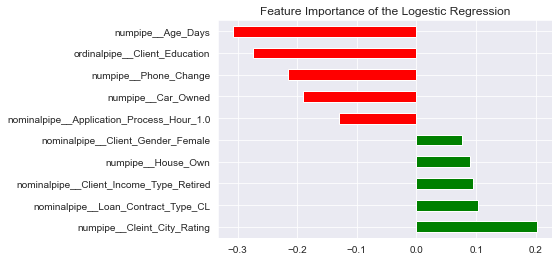

In [1123]:
top_feature_importances.plot.barh(color =['green','green','green','green','green','red', 'red','red','red','red'])
plt.title("Feature Importance of the Logestic Regression")

Negative feature importance value means that feature makes the loss go up. Our model is not getting good use of this feature. We may remove these features to improve final quality in the future.

In [1124]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1125]:
y_pred1 = logreg_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


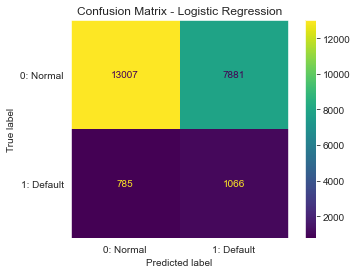

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     20888
           1       0.12      0.58      0.20      1851

    accuracy                           0.62     22739
   macro avg       0.53      0.60      0.47     22739
weighted avg       0.88      0.62      0.71     22739



In [1126]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

baseline_classification_report = classification_report(y_test, y_pred1)
print(baseline_classification_report)

In [1127]:
roc=roc_auc_score(y_test, y_pred1)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\3551474236.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303


Logistic Regression slightly improved over the baseline model (a gain of 19.7%). However, while it predicts many default cases, most of them are inaccurate and result in a low precision score.

Logistic Regression slightly improved over the baseline model (a gain of 20%). However, while it predicts many default cases, most of them are inaccurate and result in a low precision score.

In [1128]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1129]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

logreg_pipe = Pipeline([
                        ('logreg', LogisticRegression(random_state=42))]) #set up model pipeline

In [1130]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test) #preprocessing for x_test

In [1131]:
#highlight it to run
#pipe_grid = {'logreg__C': np.logspace(-4,4,5),
#              'logreg__max_iter': [200, 300]
         
#            }

#model_2_gs_pipe = GridSearchCV(estimator= logreg_pipe, 
#                             param_grid=pipe_grid, 
#                             cv=5,  # 5-fold cross-validation
#                             scoring= "roc_auc",
#                             n_jobs=-1,  # Speed up computational time by using all processors
#                             verbose=True)  # Print how many folds, candidates, and fits we're solving for    
#with parallel_backend('threading', n_jobs=-1):
#        model_2_gs_pipe.fit(x_resampled, y_resampled)

In [1132]:
#Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
#with open('model_2_gs_pipe.pkl', 'wb') as f:
#     joblib.dump(model_2_gs_pipe, f)

In [1133]:
# Load in pickled object
with open('model_2_gs_pipe.pkl', 'rb') as f:
    model_2_gs_pipe = joblib.load(f)

In [1134]:
optimal_C = model_2_gs_pipe.best_params_['logreg__C']
optimal_max_iter = model_2_gs_pipe.best_params_['logreg__max_iter']
logreg2_pipe = Pipeline([
                        ('logreg', LogisticRegression(C=optimal_C, max_iter=optimal_max_iter,random_state=42))]) #set up logestic regression w the best parameter
logreg2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('logreg',
                 LogisticRegression(C=0.01, max_iter=200, random_state=42))])

In [1135]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1136]:
y_pred2 = logreg2_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


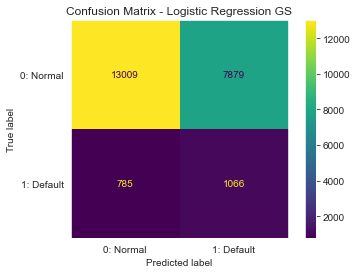

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     20888
           1       0.12      0.58      0.20      1851

    accuracy                           0.62     22739
   macro avg       0.53      0.60      0.47     22739
weighted avg       0.88      0.62      0.71     22739



In [1137]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(logreg2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Logistic Regression GS')
plt.show()

LogisticRegressionGS_classification_report = classification_report(y_test, y_pred2)
print(LogisticRegressionGS_classification_report)

In [1138]:
roc=roc_auc_score(y_test, y_pred2)
acc = accuracy_score(y_test, y_pred2)
prec = precision_score(y_test, y_pred2)
rec = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

results = pd.DataFrame([['Logistic Regression GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\3554742584.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351


Optimal hyperparameters do not improve our F1 score or Recall score the logistic regression gridsearch model. We are going to move on to the decision tree model.

# Decision Tree

In [1139]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline   

dt_pipe = Pipeline([
                    
                    ('dt', DecisionTreeClassifier(random_state=42))]) #set up model pipeline  


In [1140]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1141]:
print_cv_scores(dt_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.914654
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.92568
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.914654
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.913443
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.914654


In [1142]:
dt_pipe.fit(x_resampled, y_resampled)  #train the DT model

Pipeline(steps=[('dt', DecisionTreeClassifier(random_state=42))])

In [1143]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1144]:
y_pred3 = dt_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


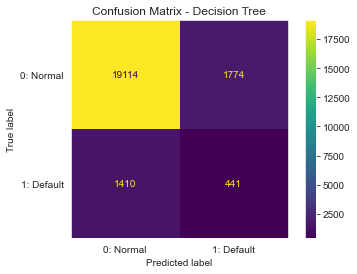

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     20888
           1       0.20      0.24      0.22      1851

    accuracy                           0.86     22739
   macro avg       0.57      0.58      0.57     22739
weighted avg       0.87      0.86      0.87     22739



In [1145]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred3)
print(dt_classification_report)

In [1146]:
roc=roc_auc_score(y_test, y_pred3)
acc = accuracy_score(y_test, y_pred3)
prec = precision_score(y_test, y_pred3)
rec = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\1179947049.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351
3,Decision Tree,0.859976,0.199097,0.238250,0.216921,0.576660


Decision Tree F1 score improves slightly against Logistic Regression models. It predicts less true default case but it also has a less of false default case and result a better precision score.

Decision Tree- Model 2

From validation, decision tree overfit the data, so lets try to optimize two of the main pruning methods: min_samples_leaf and max_features to reduce overfit.

In [1147]:
pipe_grid = {    
              'dt__min_samples_leaf': [5, 6, 7], #minimum number of samples required in the leaf mode
              'dt__max_features': [10, 20, 30]} #number of features to decide on next split to prevent overfittinh
            
model_dt_gs_pipe = GridSearchCV(estimator= dt_pipe, 
                             param_grid=pipe_grid, 
                             cv=5,  # 5-fold cross-validation
                             scoring= "roc_auc",
                             n_jobs=-1,  # Speed up computational time by using all processors
                             verbose=True)  # Print how many folds, candidates, and fits we're solving for
with parallel_backend('threading', n_jobs=-1):
    model_dt_gs_pipe.fit(x_resampled, y_resampled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [1148]:
##Pickle GridSearchCV object so we don't have to re-run that cell when reloading notebook
with open('model_dt_gs_pipe.pkl', 'wb') as f:
     joblib.dump(model_dt_gs_pipe, f)

In [1149]:
with open('model_dt_gs_pipe.pkl', 'rb') as f:
    model_dt_gs_pipe = joblib.load(f)

In [1150]:
optimal_min_samples_leaf = model_dt_gs_pipe.best_params_['dt__min_samples_leaf']
optimal_max_features = model_dt_gs_pipe.best_params_['dt__max_features']
dt2_pipe = Pipeline([
                        ('dt',DecisionTreeClassifier(min_samples_leaf = optimal_min_samples_leaf, max_features=optimal_max_features, random_state=42))]) #set up logestic regression w the best parameter
dt2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(max_features=30, min_samples_leaf=7,
                                        random_state=42))])

In [1151]:
print_cv_scores(dt2_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 0.94456
Cross_Val Accuracy: 0.902081
----------------------------------------
Training Macro Precision: 0.945314
Cross_Val Macro Precision: 0.910474
----------------------------------------
Training Macro Recall: 0.94456
Cross_Val Macro Recall: 0.902081
----------------------------------------
Training Macro F1 Score: 0.944534
Cross_Val Macro F1 Score: 0.900631
----------------------------------------
Training Macro AUC Score: 0.990499
Cross_Val Macro AUC Score: 0.945323


In [1152]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1153]:
y_pred4 = dt2_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


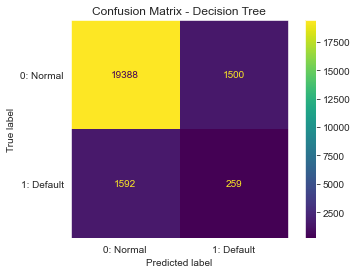

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     20888
           1       0.15      0.14      0.14      1851

    accuracy                           0.86     22739
   macro avg       0.54      0.53      0.53     22739
weighted avg       0.86      0.86      0.86     22739



In [1154]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(dt2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_classification_report = classification_report(y_test, y_pred4)
print(dt_classification_report)

In [1155]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Decision Tree GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\3459039034.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351
3,Decision Tree,0.859976,0.199097,0.238250,0.216921,0.576660
4,Decision Tree GS,0.864022,0.147243,0.139924,0.143490,0.534056


It reduces overfit a little bit but we a have a significant worse in F1 score.

# Random forest

In [1156]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

rf_pipe = Pipeline([
                     
                     ('rf_clf', RandomForestClassifier(random_state=42))]) #set up model pipeline

In [1157]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1158]:
rf_pipe.fit(x_resampled, y_resampled)  #train the RF model

Pipeline(steps=[('rf_clf', RandomForestClassifier(random_state=42))])

In [1159]:
print_cv_scores(rf_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.9624
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.971988
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.9624
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.961175
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.989913


In [1160]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)# train prepipeline get balanced data for test

In [1161]:
y_pred4 = rf_pipe.predict(x_test_processed) # rf prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


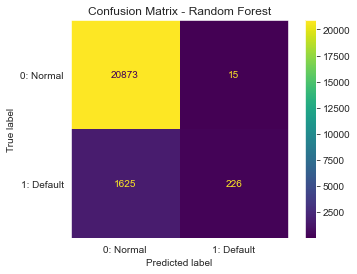

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20888
           1       0.94      0.12      0.22      1851

    accuracy                           0.93     22739
   macro avg       0.93      0.56      0.59     22739
weighted avg       0.93      0.93      0.90     22739



In [1162]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(rf_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_classification_report = classification_report(y_test, y_pred4)
print(rf_classification_report)

In [1163]:
roc=roc_auc_score(y_test, y_pred4)
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

results = pd.DataFrame([['Random Forrest', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\2163201458.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351
3,Decision Tree,0.859976,0.199097,0.238250,0.216921,0.576660
4,Decision Tree GS,0.864022,0.147243,0.139924,0.143490,0.534056
5,Random Forrest,0.927877,0.937759,0.122096,0.216061,0.560689


Random forrest model produce a high precision score but it rarely classify the true default case and reuslt a low recall score.

# AdaBoost

In [1164]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

ab_pipe = Pipeline([                
                      ('ab_clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42))]) #set up model pipeline

In [1165]:
x_resampled, y_resampled = pre_pipe.fit_resample(x_train, y_train) # train prepipeline get balanced data for train

In [1166]:
ab_pipe.fit(x_resampled, y_resampled)  #train the AB model

Pipeline(steps=[('ab_clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                    random_state=42))])

In [1167]:
print_cv_scores(ab_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.914212
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.925354
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.914212
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.912987
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.914212


In [1168]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)# train prepipeline get balanced data for test

In [1169]:
y_pred5 = ab_pipe.predict(x_test_processed)

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


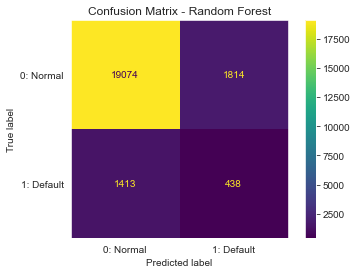

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20888
           1       0.19      0.24      0.21      1851

    accuracy                           0.86     22739
   macro avg       0.56      0.57      0.57     22739
weighted avg       0.87      0.86      0.86     22739



In [1170]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(ab_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

ab_classification_report = classification_report(y_test, y_pred5)
print(ab_classification_report)

In [1171]:
roc=roc_auc_score(y_test, y_pred5)
acc = accuracy_score(y_test, y_pred5)
prec = precision_score(y_test, y_pred5)
rec = recall_score(y_test, y_pred5)
f1 = f1_score(y_test, y_pred5)

results = pd.DataFrame([['Ada Boost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\2187843560.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351
3,Decision Tree,0.859976,0.199097,0.238250,0.216921,0.576660
4,Decision Tree GS,0.864022,0.147243,0.139924,0.143490,0.534056
5,Random Forrest,0.927877,0.937759,0.122096,0.216061,0.560689
6,Ada Boost,0.858085,0.194494,0.236629,0.213502,0.574892


ADA-GS

In [1172]:
pipe_grid = { 
            'ab_clf__n_estimators' : [10, 50, 100],       
            'ab_clf__learning_rate' : [ 0.001, 0.01, 0.1]  
            }
model_ab_gs_pipe = GridSearchCV(estimator= ab_pipe, 
                             param_grid=pipe_grid, 
                             cv=5,  # 5-fold cross-validation
                             scoring= "roc_auc",
                             n_jobs=-1,  # Speed up computational time by using all processors
                             verbose=True)  # Print how many folds, candidates, and fits we're solving for
with parallel_backend('threading', n_jobs=-1):
     model_ab_gs_pipe.fit(x_resampled, y_resampled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [1173]:
with open('model_ab_gs_pipe.pkl', 'wb') as f:
     joblib.dump(model_ab_gs_pipe, f)

In [1174]:
with open('model_ab_gs_pipe.pkl', 'rb') as f:
    model_ab_gs_pipe = joblib.load(f)

In [1175]:
optimal_n_estimators = model_ab_gs_pipe.best_params_['ab_clf__n_estimators']
optimal_learning_rate = model_ab_gs_pipe.best_params_['ab_clf__learning_rate']
ab2_pipe = Pipeline([   ('ab_clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators = optimal_n_estimators, learning_rate=optimal_learning_rate,random_state=42))
                        ]) #set up logestic regression w the best parameter
ab2_pipe.fit(x_resampled, y_resampled)

Pipeline(steps=[('ab_clf',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                    learning_rate=0.001, n_estimators=10,
                                    random_state=42))])

In [1176]:
print_cv_scores(ab2_pipe, x_resampled, y_resampled.values.ravel())

Training Accuracy: 1.0
Cross_Val Accuracy: 0.914212
----------------------------------------
Training Macro Precision: 1.0
Cross_Val Macro Precision: 0.925354
----------------------------------------
Training Macro Recall: 1.0
Cross_Val Macro Recall: 0.914212
----------------------------------------
Training Macro F1 Score: 1.0
Cross_Val Macro F1 Score: 0.912987
----------------------------------------
Training Macro AUC Score: 1.0
Cross_Val Macro AUC Score: 0.914212


In [1177]:
x_test_processed = pre_pipe.named_steps['ct'].transform(x_test)

In [1178]:
y_pred6 = ab2_pipe.predict(x_test_processed) #prediction

C:\Users\eggfr\anaconda3\envs\tensor_flow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


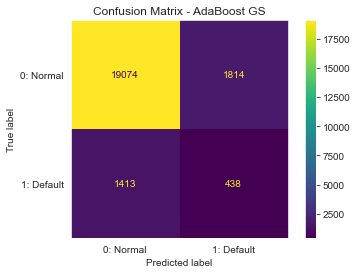

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20888
           1       0.19      0.24      0.21      1851

    accuracy                           0.86     22739
   macro avg       0.56      0.57      0.57     22739
weighted avg       0.87      0.86      0.86     22739



In [1179]:
status_labels = ['0: Normal', '1: Default']
plot_confusion_matrix(ab2_pipe,x_test_processed,y_test,display_labels = status_labels)
plt.grid(False)
plt.title('Confusion Matrix - AdaBoost GS')
plt.show()

ab2_classification_report = classification_report(y_test, y_pred6)
print(ab2_classification_report)

In [1180]:
roc=roc_auc_score(y_test, y_pred6)
acc = accuracy_score(y_test, y_pred6)
prec = precision_score(y_test, y_pred6)
rec = recall_score(y_test, y_pred6)
f1 = f1_score(y_test, y_pred6)

results = pd.DataFrame([['Ada Boost GS', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\3593632169.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351
3,Decision Tree,0.859976,0.199097,0.238250,0.216921,0.576660
4,Decision Tree GS,0.864022,0.147243,0.139924,0.143490,0.534056
5,Random Forrest,0.927877,0.937759,0.122096,0.216061,0.560689
6,Ada Boost,0.858085,0.194494,0.236629,0.213502,0.574892
7,Ada Boost GS,0.858085,0.194494,0.236629,0.213502,0.574892


Our machine learning models dont produce a good F1 score, so I decide to see if neural network would give us a better prediction. Let's set up a neural baseline work.

In [1181]:
pre_pipe = Pipeline([('ct', ct),
                     ('smote', SMOTE(random_state=11))])  #setup preprocessing pipeline 

In [1182]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [1183]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [1184]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [1185]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'train_loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

Neural Network_baseline

In [1186]:
model_nn_base = Sequential()
model_nn_base.add(Dense(16, input_shape=(99,), activation='relu')),
model_nn_base.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_base.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_base.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 16)                1600      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________


In [1187]:
# terminate training if doesnt improve on specified min_delta for 5 epochs
earlystopper = EarlyStopping(monitor='accuracy', min_delta = 1e-2, patience = 5)

In [1188]:
results_nn_base = model_nn_base.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    callbacks = [earlystopper])

Epoch 1/10
28407/28407 [==============================] - 90s 3ms/step - loss: 0.5963 - tp: 30270.0000 - fp: 17605.0000 - tn: 65943.0000 - fn: 28213.0000 - accuracy: 0.6774 - precision: 0.6323 - recall: 0.5176 - auc: 0.7298 - prc: 0.6297 - val_loss: 0.7140 - val_tp: 14983.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 10082.0000 - val_accuracy: 0.5978 - val_precision: 1.0000 - val_recall: 0.5978 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/10
28407/28407 [==============================] - 81s 3ms/step - loss: 0.5648 - tp: 34453.0000 - fp: 17801.0000 - tn: 65747.0000 - fn: 24030.0000 - accuracy: 0.7055 - precision: 0.6593 - recall: 0.5891 - auc: 0.7677 - prc: 0.6761 - val_loss: 0.7246 - val_tp: 14731.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 10334.0000 - val_accuracy: 0.5877 - val_precision: 1.0000 - val_recall: 0.5877 - val_auc: 0.0000e+00 - val_prc: 1.00000000 - fn: 23501.0000 - accuracy: 0.7054 - precision: 0.6593 - recall: 0.5
Epoch 3/10
28407/28407 [====

In [1189]:
y_pred_nn = model_nn_base.predict(x_test_processed) #nn base model predict

In [1190]:
y_test_binary=(y_pred_nn<0.5).astype(int).flatten() #need to change this to binary for confustion matrix

In [1191]:
#from sklearn.metrics import confusion_matrix

In [1192]:
cm = confusion_matrix(y_test.values,y_test_binary)

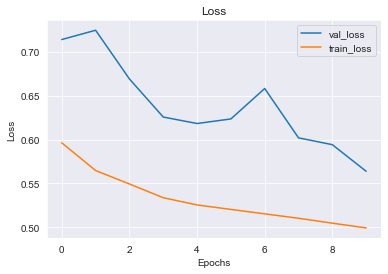

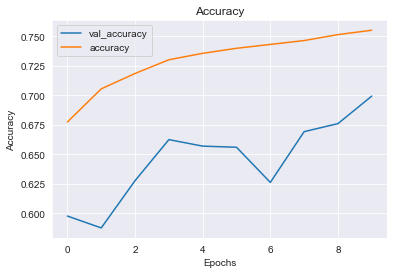

In [1193]:
visualize_training_results(results_nn_base)

In [1194]:
roc=roc_auc_score(y_test, y_test_binary)
acc = accuracy_score(y_test, y_test_binary)
prec = precision_score(y_test, y_test_binary)
rec = recall_score(y_test, y_test_binary)
f1 = f1_score(y_test,y_test_binary)

results = pd.DataFrame([['NN Base', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\112265882.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351
3,Decision Tree,0.859976,0.199097,0.238250,0.216921,0.576660
4,Decision Tree GS,0.864022,0.147243,0.139924,0.143490,0.534056
5,Random Forrest,0.927877,0.937759,0.122096,0.216061,0.560689
6,Ada Boost,0.858085,0.194494,0.236629,0.213502,0.574892
7,Ada Boost GS,0.858085,0.194494,0.236629,0.213502,0.574892
8,NN Base,0.224944,0.069256,0.685035,0.125794,0.434604


In [1195]:
# Create a confusion matrix
def plot_confusion_matrix_nn(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 3847 17041]
 [  583  1268]]


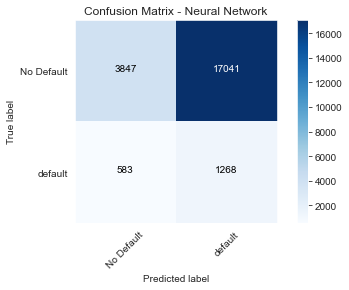

In [1196]:
plot_confusion_matrix_nn(cm,['No Default','default'])
plt.grid(False)
plt.title('Confusion Matrix - Neural Network')
plt.show()

Add l1 regulaizer

The baseline model shows that the model overfits, and we will put a regularizer at the last layer to see if it would improve.

In [1197]:
# establish the regularization strength of lambda
reg_l1 = l1(3e-3) # 1e-5 to .1

In [1198]:
x_resampled_clean = np.asarray(x_resampled).astype(np.float32)
x_test_processed_clean = np.asarray(x_test_processed).astype(np.float32)
y_resampled_clean = np.asarray(y_resampled).astype(np.float32)
y_test_clean = np.asarray(y_test).astype(np.float32)

In [1199]:
model_nn_l1 = Sequential()
model_nn_l1.add(Dense(16, input_shape=(99,), activation='relu')),
model_nn_l1.add(Dense(32, activation='relu')),
model_nn_l1.add(Dropout(0.2)),
model_nn_l1.add(Dense(32, 
                     activation='relu',
                     kernel_regularizer = reg_l1)),
model_nn_l1.add(Dense(1, activation='sigmoid'))
#Compile model
model_nn_l1.compile(
                loss='binary_crossentropy', 
                optimizer= keras.optimizers.Adam(learning_rate=1e-3),
                metrics=METRICS)
model_nn_l1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                1600      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________


In [1200]:
results_nn_l1 = model_nn_l1.fit(
                    x=x_resampled_clean, 
                    y=y_resampled_clean, 
                    epochs=10, 
                    batch_size=5, 
                    validation_split=0.15,
                    callbacks = [earlystopper])


Epoch 1/10
28407/28407 [==============================] - 117s 4ms/step - loss: 0.6162 - tp: 48807.0000 - fp: 18446.0000 - tn: 65102.0000 - fn: 34741.0000 - accuracy: 0.6817 - precision: 0.7257 - recall: 0.5842 - auc: 0.7533 - prc: 0.7664 - val_loss: 0.7723 - val_tp: 13785.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 11280.0000 - val_accuracy: 0.5500 - val_precision: 1.0000 - val_recall: 0.5500 - val_auc: 0.0000e+00 - val_prc: 1.0000y: 0.6817 - precision: 0.7258 - recall: 0.5842 - auc: 0.7533 - prc: 0.76
Epoch 2/10
28407/28407 [==============================] - 97s 3ms/step - loss: 0.5626 - tp: 35548.0000 - fp: 17015.0000 - tn: 66533.0000 - fn: 22935.0000 - accuracy: 0.7187 - precision: 0.6763 - recall: 0.6078 - auc: 0.7786 - prc: 0.6931 - val_loss: 0.6482 - val_tp: 16463.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 8602.0000 - val_accuracy: 0.6568 - val_precision: 1.0000 - val_recall: 0.6568 - val_auc: 0.0000e+00 - val_prc: 1.0000 - fn: 22239.0000 - accuracy: 0

In [1201]:
y_pred_nn_l1 = model_nn_l1.predict(x_test_processed) #nn base model predict

In [1202]:
y_test_binary=(y_pred_nn_l1<0.5).astype(int).flatten() #need to change this to binary for confustion matrix

In [1203]:
cm = confusion_matrix(y_test.values,y_test_binary)

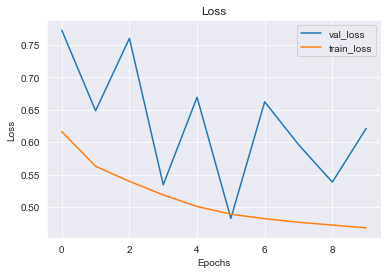

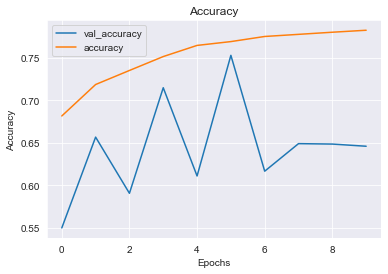

In [1204]:
visualize_training_results(results_nn_l1)

Confusion matrix, without normalization
[[ 1874 19014]
 [  305  1546]]


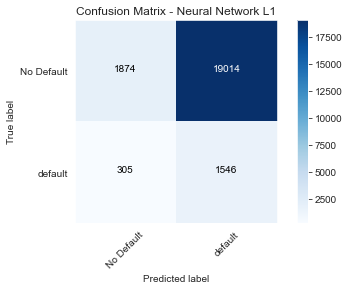

In [1205]:
plot_confusion_matrix_nn(cm,['No Default','default'])
plt.grid(False)
plt.title('Confusion Matrix - Neural Network L1')
plt.show()

In [1206]:
roc=roc_auc_score(y_test, y_test_binary)
acc = accuracy_score(y_test, y_test_binary)
prec = precision_score(y_test, y_test_binary)
rec = recall_score(y_test, y_test_binary)
f1 = f1_score(y_test,y_test_binary)

results = pd.DataFrame([['NN L1', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

sum_results = sum_results.append(results, ignore_index = True)
sum_results

C:\Users\eggfr\AppData\Local\Temp\ipykernel_15608\2611501536.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_results = sum_results.append(results, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Baseline,0.918598,0.000000,0.000000,0.000000,0.500000
1,Logistic Regression,0.618893,0.119146,0.575905,0.197444,0.599303
2,Logistic Regression GS,0.618981,0.119173,0.575905,0.197481,0.599351
3,Decision Tree,0.859976,0.199097,0.238250,0.216921,0.576660
4,Decision Tree GS,0.864022,0.147243,0.139924,0.143490,0.534056
5,Random Forrest,0.927877,0.937759,0.122096,0.216061,0.560689
6,Ada Boost,0.858085,0.194494,0.236629,0.213502,0.574892
7,Ada Boost GS,0.858085,0.194494,0.236629,0.213502,0.574892
8,NN Base,0.224944,0.069256,0.685035,0.125794,0.434604
9,NN L1,0.150402,0.075195,0.835224,0.137968,0.462470


Even with l1 regulaizer, the model still overfits, although the accuracy improves slightly.

#Conclusion, Recommendations, and Next Steps

Conclusion

Most of our models have an F1 score of around .2. The results are far from the perfect F1 score of 1. We select the logistic regression model compared to the other models because it has a higher recall score, at .59, which means it can detect a .59 actual default case. However, logistic regression models also classify many defaults incorrectly, resulting in a low precision score and F1 score.

Little improvement from hyper parameter tuning- all 3 of my gridsearch models produce slight difference than the model that use default parameter.  
Client_city_Rating, Loan_contract_type_CL, House_own, Client_Income_Retired Gender_Female are the top 5 important features for determining class labels in the Logestic Regression Model. 


ecommendations and Use Cases:

Be cautious when selling potential default loans: If our stakeholder wants to get rid of the potential default loan by selling it to the ABS market, it comes with a risk of selling many normal loans. While our model can identify the default loan, it also misidentifies the normal loan, and it can create a financial loss for selling the good loan.

Examine Loan_contract_type_cl, and Client_Income_Type_Retired: These two data should be examined further to see if cash_type loan and retired group carry more risk of default. 

Examine with payment history:This data set mainly consists of borrowers' backgrounds and behavior. We want to investigate it further to see if the borrower's payment history pattern would change the prediction of this analysis.
  

In [ ]:
Next Step:

Further investigation on refining hyperparameters: All 3 of my grid search models produce similar results compared to their default parameters. I probably need to check the hyperparameter sensitivity or if I have a range of unfit values.   

Experiment with other balancing techniques. SMOTE is used to oversample the imbalanced data, but I didn't see an improving result. I might need to investigate why my models struggle with SMOTE in the current setting, or I need to explore some other strategies to balance the imbalanced data.

Further investigation with the neural network: The neural network baseline model predicts a lot of defaults with a slight overfit issue, but the accuracy issue makes them usable. Due to time constraints, I was not able to investigate further. I would like to see if neural networks perform better than machine learning models.